# Research Insights

* While the average fare revenue is higher per ride for rural areas, urban area still make up the majority of total revenue.

* Urban areas, expectedly, have higher ridership and number of drivers.

* Probably owing trends in supply and demand, there is a relatively strong (adj. R-squared = 0.769) negative relationship between number of rides and average fare per city.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os


In [2]:
# Pulling in the CSVs
city_data_path = os.path.join('raw_data', 'city_data.csv')
ride_data_path = os.path.join('raw_data', 'ride_data.csv')

# Making dataframes
city_df = pd.read_csv(city_data_path)
ride_df = pd.read_csv(ride_data_path)


In [3]:
# Looking at the city df
city_df.head(15)

city_df.tail(15)

city_df.describe(include="all")


,city,driver_count,type
count,120,120.000000,120
unique,120,NaN,3
top,North Holly,NaN,Urban
freq,1,NaN,66
mean,NaN,24.775000,NaN
std,NaN,20.277678,NaN
min,NaN,1.000000,NaN
25%,NaN,7.000000,NaN
50%,NaN,20.500000,NaN
75%,NaN,38.250000,NaN


In [4]:
# Looking at the ride df
ride_df.head(15)

ride_df.tail(15)

ride_df.describe(include="all")


,city,date,fare,ride_id
count,2375,2375,2375.000000,2.375000e+03
unique,120,2375,NaN,NaN
top,West Angela,2018-04-07 14:43:07,NaN,NaN
freq,39,1,NaN,NaN
mean,NaN,NaN,26.753112,4.887270e+12
std,NaN,NaN,12.109465,2.907361e+12
min,NaN,NaN,4.050000,3.218337e+08
25%,NaN,NaN,17.190000,2.381175e+12
50%,NaN,NaN,26.600000,4.748541e+12
75%,NaN,NaN,36.645000,7.461936e+12


In [5]:
# Cleaning up the data
city_df = city_df.drop_duplicates('city', keep = 'first')

# Merging the city and ride dfs 
city_ride_df = city_df.merge(ride_df, on = 'city')


In [6]:
# Looking at the merged df
city_ride_df.head()

ride_df.describe(include='all')


,city,date,fare,ride_id
count,2375,2375,2375.000000,2.375000e+03
unique,120,2375,NaN,NaN
top,West Angela,2018-04-07 14:43:07,NaN,NaN
freq,39,1,NaN,NaN
mean,NaN,NaN,26.753112,4.887270e+12
std,NaN,NaN,12.109465,2.907361e+12
min,NaN,NaN,4.050000,3.218337e+08
25%,NaN,NaN,17.190000,2.381175e+12
50%,NaN,NaN,26.600000,4.748541e+12
75%,NaN,NaN,36.645000,7.461936e+12


In [7]:
# Grouping by city  
city_group = city_ride_df.groupby('city')

# Avg fare per city
avg_fare = city_group['fare'].mean().round(2)

# Rides per city
ride_count = city_group['ride_id'].count()

# N of drivers per city
driver_count = city_group['driver_count'].mean()

# Creating a df w/city type as index
city_type_df = city_df.set_index('city')['type']

# Making a df from above series
city_info_df = pd.DataFrame({
    'Number of Rides': ride_count,
    'Average Fare': avg_fare,
    'Number of Drivers': driver_count,
    'City Type': city_type_df
})

In [8]:
# Looking at the city info df by n of drivers
city_info_df.sort_values('Number of Drivers', ascending = False).head(15)

,Number of Rides,Average Fare,Number of Drivers,City Type
West Samuelburgh,25,21.77,73,Urban
South Michelleport,31,24.45,72,Urban
West Anthony,30,24.74,70,Urban
Liumouth,33,26.15,69,Urban
Port Angela,19,23.84,67,Urban
Reynoldsfurt,19,21.92,67,Urban
East Kaylahaven,29,23.76,65,Urban
Royland,30,20.57,64,Urban
Jerryton,25,25.65,64,Urban
Grahamburgh,25,25.22,61,Urban


In [9]:
# Creating different dfs for the city types
rural_cities = city_info_df[city_info_df['City Type'] == 'Rural']
suburban_cities = city_info_df[city_info_df['City Type'] == 'Suburban']
urban_cities = city_info_df[city_info_df['City Type'] == 'Urban']


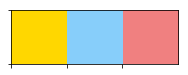

In [10]:
# Setting up the colors
colors = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

# Assigning the colors to the city type names
city_type_colors = {'Urban': colors['Gold'], 'Suburban': colors['Light Sky Blue'], 'Rural': colors['Light Coral']}

# Checking what they look like
sns.palplot(sns.color_palette(colors.values()))
plt.show()


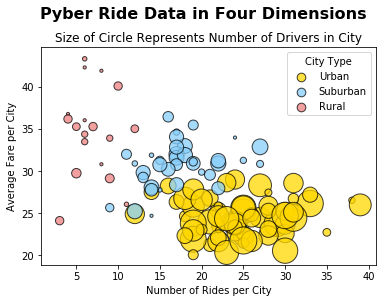

In [11]:
# Making three overlaying scatter plots of the different city types
plt.scatter(urban_cities['Number of Rides'], urban_cities['Average Fare'], s = urban_cities['Number of Drivers']*10, color = city_type_colors['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban_cities['Number of Rides'], suburban_cities['Average Fare'], s = suburban_cities['Number of Drivers']*10, color = city_type_colors['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural_cities['Number of Rides'], rural_cities['Average Fare'], s = rural_cities['Number of Drivers']*10, color = city_type_colors['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)

# Titles & labels
plt.suptitle('Pyber Ride Data in Four Dimensions', verticalalignment="baseline", weight="bold", fontsize=16)
plt.title('Size of Circle Represents Number of Drivers in City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

# Setting up the legend
lgnd = plt.legend(title="City Type")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Saving up the plot
scatterplot_path = os.path.join('graphs_and_plots', 'pyber_scatterplot.png')
plt.savefig(scatterplot_path, dpi=300, bbox_inches='tight')

plt.show()


In [12]:
# Creating an ordinanry least squares regression model and fitting it to the data to find it to the adjusted R-squared
n_rides_avg_fare_ols_model = sm.OLS(city_info_df['Average Fare'], city_info_df['Number of Rides']).fit()

n_rides_avg_fare_ols_model_ajrsq = n_rides_avg_fare_ols_model.rsquared_adj.round(3)

print(f"Adj. R-squared: {n_rides_avg_fare_ols_model_ajrsq}")

Adj. R-squared: 0.769


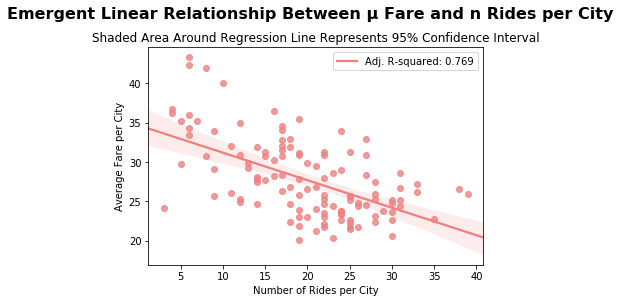

In [13]:
# Visualizing the linear relationship between number of rides and average fare per city
sns.regplot(x = city_info_df['Number of Rides'], y = city_info_df['Average Fare'], data = city_info_df, robust = True, color = city_type_colors['Rural'])

# Titles & labels
plt.suptitle('Emergent Linear Relationship Between μ Fare and n Rides per City', verticalalignment="baseline", weight="bold", fontsize=16)
plt.title('Shaded Area Around Regression Line Represents 95% Confidence Interval')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

# Setting up the legend
plt.legend([f"Adj. R-squared: {n_rides_avg_fare_ols_model_ajrsq}"])

# Saving up the plot
regression_plot_path = os.path.join('graphs_and_plots', 'pyber_regression_scatterplot.png')
plt.savefig(regression_plot_path, dpi=300, bbox_inches='tight')

plt.show()

In [14]:
# Grouping by city type  
city_type_group = city_ride_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

# Calculating total fare per city type
fare_sum_per_city_type = city_type_group.sum()['fare']

# Getting the count of rides per city type
rides_per_city_type = city_type_group.count()['ride_id']

# Getting the count of drivers per city type
drivers_per_city_type = city_df.groupby('type').sum()['driver_count']

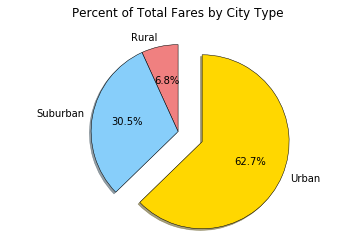

In [15]:
# Setting up the total fares pie chart's title, labels, colors, explode, & axis dist
plt.title('Percent of Total Fares by City Type')
fare_sum_pie_labels = fare_sum_per_city_type.index
pie_colors = [city_type_colors[n] for n in fare_sum_pie_labels]
explode = [0 , 0, .3]
plt.axis('equal')

# Loading data into pie chart
plt.pie(fare_sum_per_city_type, startangle = 90, colors = pie_colors, explode = explode, labels = fare_sum_pie_labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

# Saving up the chart
total_fares_pie_chart_path = os.path.join('graphs_and_plots', 'pyber_total_fares_pie_chart.png')
plt.savefig(total_fares_pie_chart_path, dpi=300, bbox_inches='tight')

plt.show()

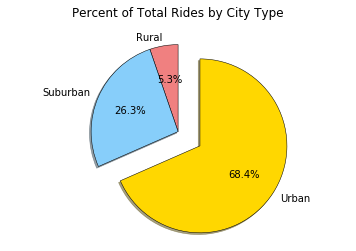

In [16]:
# Setting up total rides pie chart
plt.title('Percent of Total Rides by City Type')
rides_pie_labels = rides_per_city_type.index
plt.axis('equal')

# Loading data into pie chart
plt.pie(rides_per_city_type, startangle = 90, explode = explode, colors = pie_colors, labels = rides_pie_labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

# Saving up the chart
total_rides_pie_chart_path = os.path.join('graphs_and_plots', 'pyber_total_rides_pie_chart.png')
plt.savefig(total_rides_pie_chart_path, dpi=300, bbox_inches='tight')

plt.show()

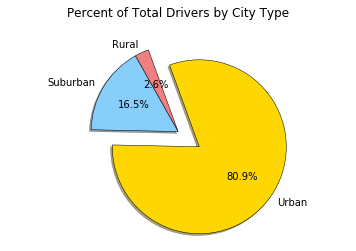

In [17]:
# Setting up total drivers pie chart
plt.title('Percent of Total Drivers by City Type')
drivers_pie_labels = drivers_per_city_type.index
plt.axis('equal')

# Loading data into 3rd pie chart
plt.pie(drivers_per_city_type, startangle = 110, explode = explode, colors = pie_colors, labels = drivers_pie_labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

# Saving up the chart
total_drivers_pie_chart_path = os.path.join('graphs_and_plots', 'pyber_total_drivers_pie_chart.png')
plt.savefig(total_drivers_pie_chart_path, dpi=300, bbox_inches='tight')

plt.show()